In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [94]:
df= pd.read_csv('cardekho_dataset.csv')
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [95]:
df = df.drop(columns=['Unnamed: 0'],axis=1)

In [96]:
print("Size of DataFrame",df.shape)
print('-'*150)
print('The Column Name, Record Count and Data Types are as follows: ')
df.info()

Size of DataFrame (15411, 13)
------------------------------------------------------------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              

In [97]:
# Defining numerical & categorical columns
num_feature = [feature for feature in df.columns if df[feature].dtype !='O']
cat_feature = [feature for feature in df.columns if df[feature].dtype== 'O']
###Print fetures
print("We have {} numerical fetuers :  {}".format(len(num_feature),num_feature))
print("We have {} categorial feature:  {}".format(len(cat_feature),cat_feature))

We have 7 numerical fetuers :  ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorial feature:  ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


In [98]:
## Missing values
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*150)
total = df.isnull().sum().sort_values()
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
------------------------------------------------------------------------------------------------------------------------------------------------------


,Total,Percent
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


In [99]:
## Summary of data
print("Summary stats of numerical data features is : ")
print('-'*100)
df.describe()

Summary stats of numerical data features is : 
----------------------------------------------------------------------------------------------------


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [100]:
print("Summary stats of categorial data features is : ")
print('-'*100)
df.describe(include='object')

Summary stats of categorial data features is : 
----------------------------------------------------------------------------------------------------


,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [101]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


## Data representation

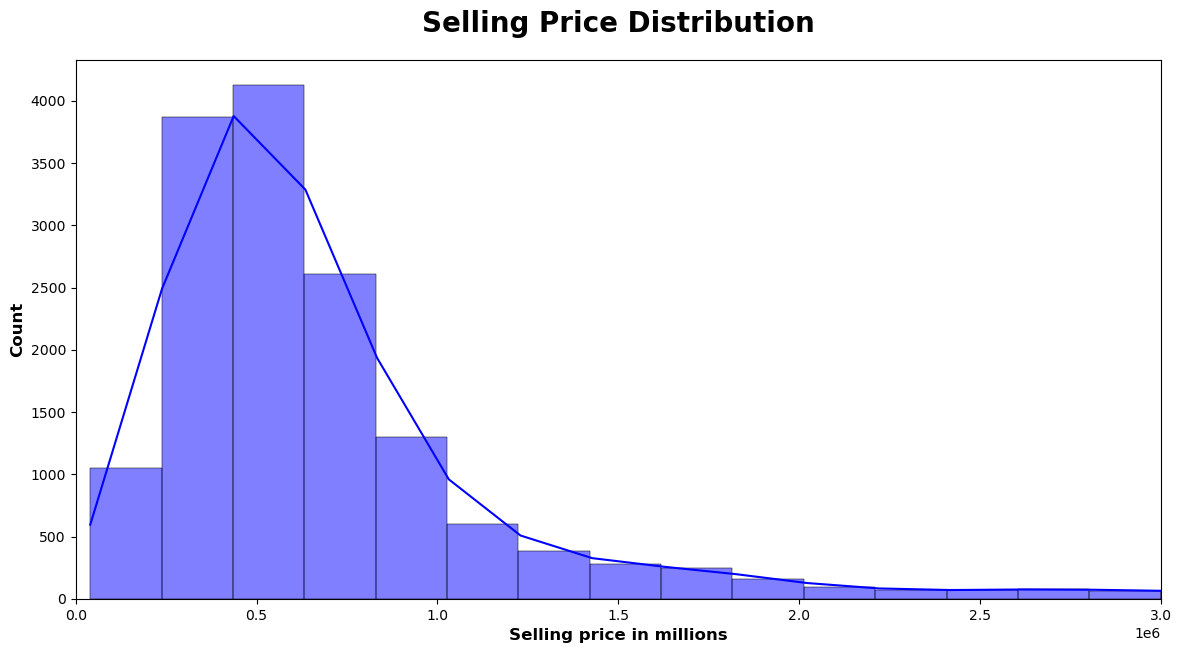

In [102]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

In [103]:
##Most car sold
print('-'*50)
print('Top 10 Sold Cars on CarDekho Website')
print('-'*50)

df.car_name.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars on CarDekho Website
--------------------------------------------------


car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: count, dtype: int64

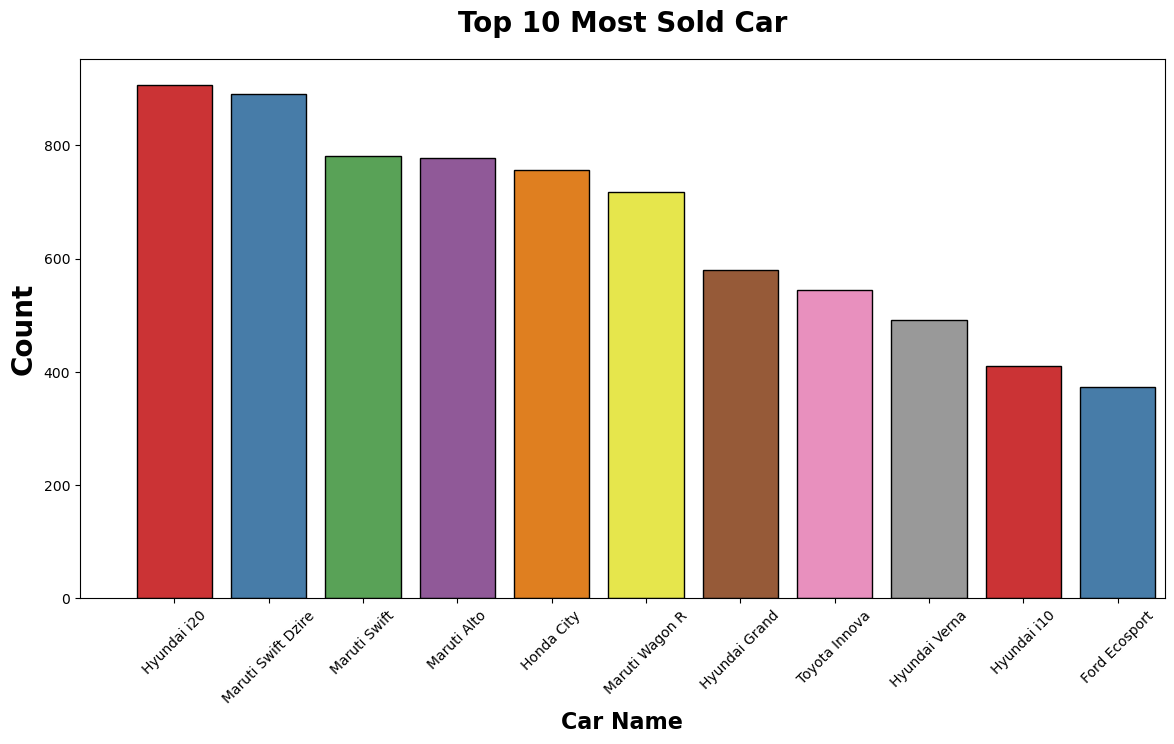

In [104]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data=df,ec = "black",palette="Set1",order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [105]:
## most car sold by brands
print('-'*50)
print('Top 10 Sold Cars on CarDekho Website')
print('-'*50)

df.brand.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars on CarDekho Website
--------------------------------------------------


brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: count, dtype: int64

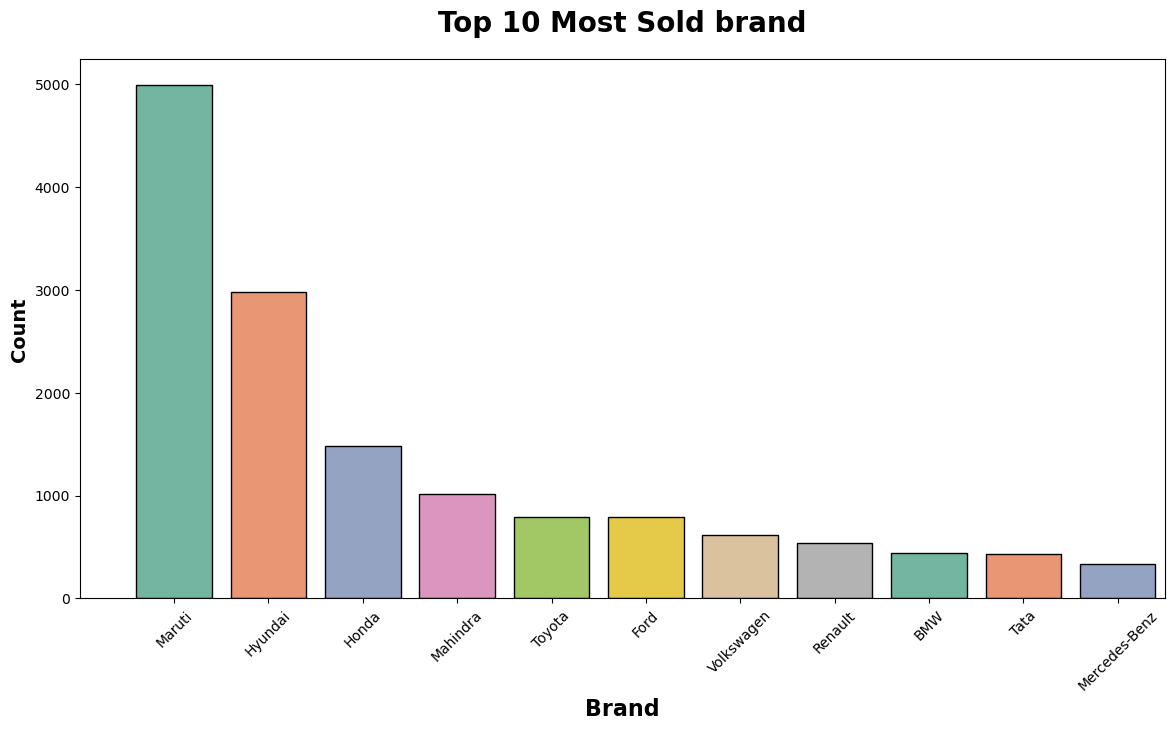

In [106]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [107]:
##Costliest car 
car= df.groupby('car_name').selling_price.max()
car =car.to_frame().sort_values('selling_price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Cars on CarDekho Website')
print('-'*50)

car

--------------------------------------------------
Top 10 Costlier Cars on CarDekho Website
--------------------------------------------------


,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


## Data preprocessing

In [108]:
## Dropping non_essential featuers 
df.drop('car_name',axis=1,inplace=True)
df.drop('brand',axis=1,inplace=True)

In [109]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [110]:
df['model'].value_counts()

model
i20            906
Swift Dzire    890
Swift          781
Alto           778
City           757
              ... 
Ghibli           1
Altroz           1
GTC4Lusso        1
Aura             1
Gurkha           1
Name: count, Length: 120, dtype: int64

In [111]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [112]:
## Making independent and dependent fearures
from sklearn.model_selection import train_test_split
X = df.drop(['selling_price'],axis=1)
y= df['selling_price']

In [113]:
X

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...,...,...
15406,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5
15407,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7
15408,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5
15409,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7


## Feature engineering and Encoding

In [114]:
len(df['model'].unique())

120

In [115]:
from sklearn.preprocessing import LabelEncoder
lm = LabelEncoder()
X['model'] = lm.fit_transform(X['model'])

In [116]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [117]:
len(df['seller_type'].unique()),len(df['fuel_type'].unique()),len(df['transmission_type'].unique())

(3, 5, 2)

In [118]:
## creating 
num_features = X.select_dtypes(exclude='object').columns
cat_features = ['seller_type','fuel_type','transmission_type']

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_trnsformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEnncoder",oh_trnsformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ],remainder='passthrough'
)

In [119]:
X= preprocessor.fit_transform(X)

In [120]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.519714,0.983562,1.247335,-0.000276,-1.324259,-1.263352,-0.403022
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.225693,-0.343933,-0.690016,-0.192071,-0.554718,-0.432571,-0.403022
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.536377,1.647309,0.084924,-0.647583,-0.554718,-0.479113,-0.403022
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.519714,0.983562,-0.360667,0.292211,-0.936610,-0.779312,-0.403022
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.666211,-0.012060,-0.496281,0.735736,0.022918,-0.046502,-0.403022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.508844,0.983562,-0.869744,0.026096,-0.767733,-0.757204,-0.403022
15407,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.556082,-1.339555,-0.728763,-0.527711,-0.216964,-0.220803,2.073444
15408,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.407551,-0.012060,0.220539,0.344954,0.022918,0.068225,-0.403022
15409,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.426247,-0.343933,72.541850,-0.887326,1.329794,0.917158,2.073444


In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape

((11558, 14), (3853, 14))

## Model Train and model selection

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,accuracy_score

In [123]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [124]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 569609.8625
- Mean Absolute Error: 276023.0438
- R2 Score: 0.6193
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 458979.4395
- Mean Absolute Error: 269685.6343
- R2 Score: 0.6713


Lasso
Model performance for Training set
- Root Mean Squared Error: 569609.8666
- Mean Absolute Error: 276021.4502
- R2 Score: 0.6193
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 458979.4614
- Mean Absolute Error: 269685.2166
- R2 Score: 0.6713


Ridge
Model performance for Training set
- Root Mean Squared Error: 569610.3643
- Mean Absolute Error: 275982.7421
- R2 Score: 0.6193
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 458962.8171
- Mean Absolute Error: 269659.0051
- R2 Score: 0.6713


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 328493.7622
- Mean 

## Hyperparameter Tunning

In [125]:
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [126]:
rc_models = [
    ('RF',RandomForestRegressor(),rf_params),
    ("KNN",KNeighborsRegressor(),knn_params)
]

In [127]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in rc_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
---------------- Best Params for KNN -------------------
{'n_neighbors': 2}


In [128]:
models = {
    'Random Forest' : RandomForestRegressor(n_estimators=500,min_samples_split=2,max_features=8,max_depth=15),
    "KNN": KNeighborsRegressor(n_neighbors=2)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Root Mean Squared Error: 133500.2062
- Mean Absolute Error: 54070.1977
- R2 Score: 0.9791
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 254112.0616
- Mean Absolute Error: 95243.2263
- R2 Score: 0.8992


KNN
Model performance for Training set
- Root Mean Squared Error: 215978.3555
- Mean Absolute Error: 64815.9284
- R2 Score: 0.9453
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 283127.4139
- Mean Absolute Error: 112997.3884
- R2 Score: 0.8749


